In [98]:
df = pd.read_csv("Processed_Mobile_dataset_5.csv")
df

,Rating,Price (₹),RAM (GB),ROM (GB),Battery (mAh),Display Size (inches),Type
0,4.5,39799,8,128,4700.0,6.70,1
1,4.4,49999,12,512,4500.0,6.70,1
2,4.4,16999,6,128,6000.0,6.67,1
3,4.4,23999,8,128,5500.0,6.67,1
4,4.1,41999,12,512,5200.0,6.78,1
...,...,...,...,...,...,...,...
524,4.6,66299,12,256,6000.0,6.82,0
525,4.2,74999,12,256,4700.0,6.30,0
526,4.0,6600,4,64,5000.0,6.71,0
527,4.4,15499,6,128,5000.0,6.70,1


In [100]:
#<-----2.Descriptive Statistical Analysis for centrality, spread and normalityimport pandas as pd

import scipy.stats as stats

# Assuming your dataframe is named df
desc_stats = df.describe().T  # Gives count, mean, std, min, 25%, 50%, 75%, max
desc_stats['skewness'] = df.skew()
desc_stats['kurtosis'] = df.kurtosis()

desc_stats


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Rating,529.0,4.379395,0.160995,3.3,4.30,4.40,4.50,4.9,-0.834831,3.812243
Price (₹),529.0,27350.478261,19901.692509,5535.0,14999.00,23999.00,36999.00,165999.0,3.169506,14.544055
RAM (GB),529.0,8.145558,2.506730,2.0,6.00,8.00,8.00,16.0,0.401259,0.119594
ROM (GB),529.0,209.421550,129.155437,32.0,128.00,128.00,256.00,1024.0,1.730982,3.589798
Battery (mAh),529.0,5380.897921,543.699331,4000.0,5000.00,5200.00,6000.00,6550.0,0.073397,-0.687094
Display Size (inches),529.0,6.677656,0.119393,6.1,6.67,6.67,6.72,6.9,-2.321111,8.196727
Type,529.0,0.786389,0.410243,0.0,1.00,1.00,1.00,1.0,-1.401493,-0.035968


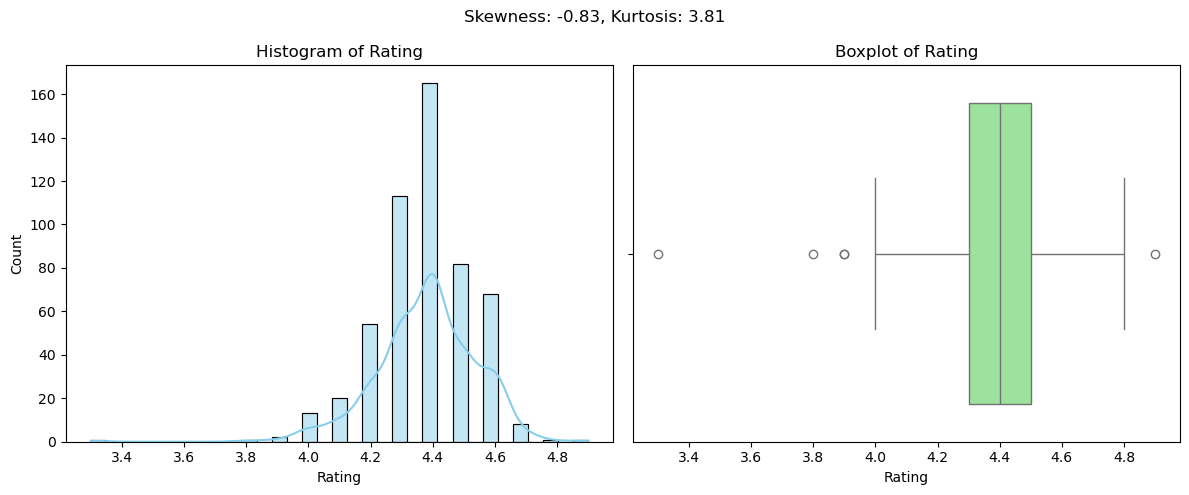

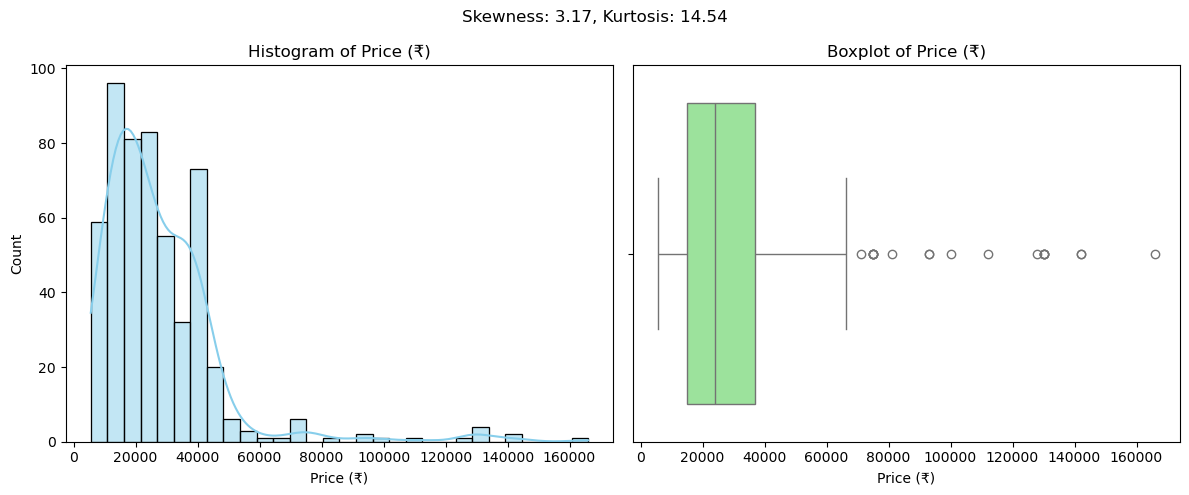

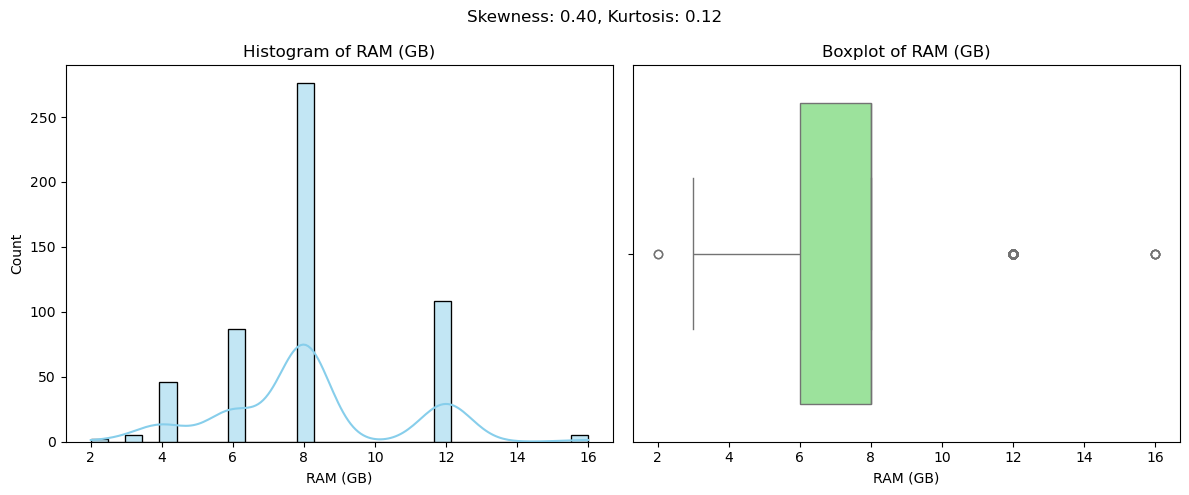

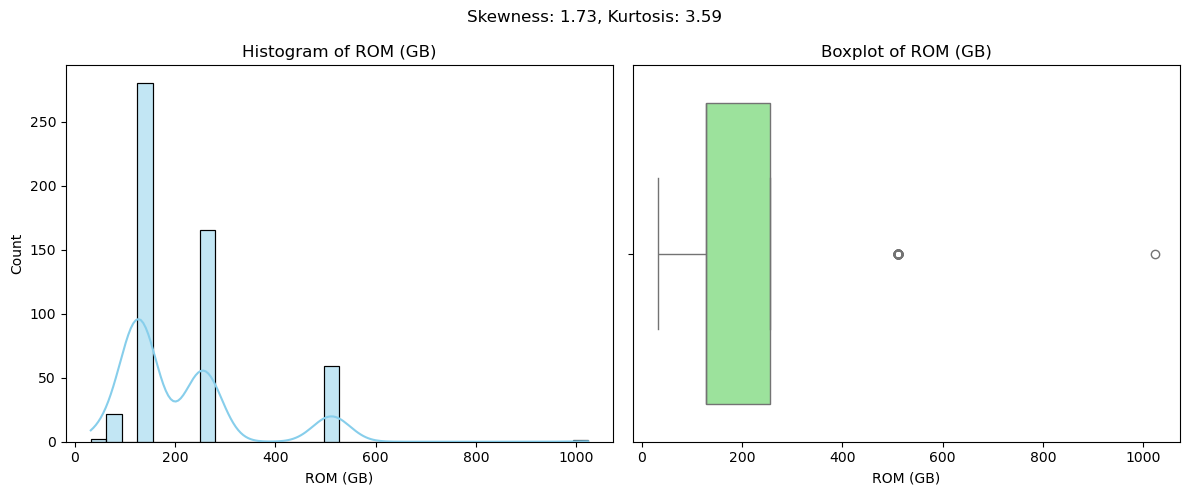

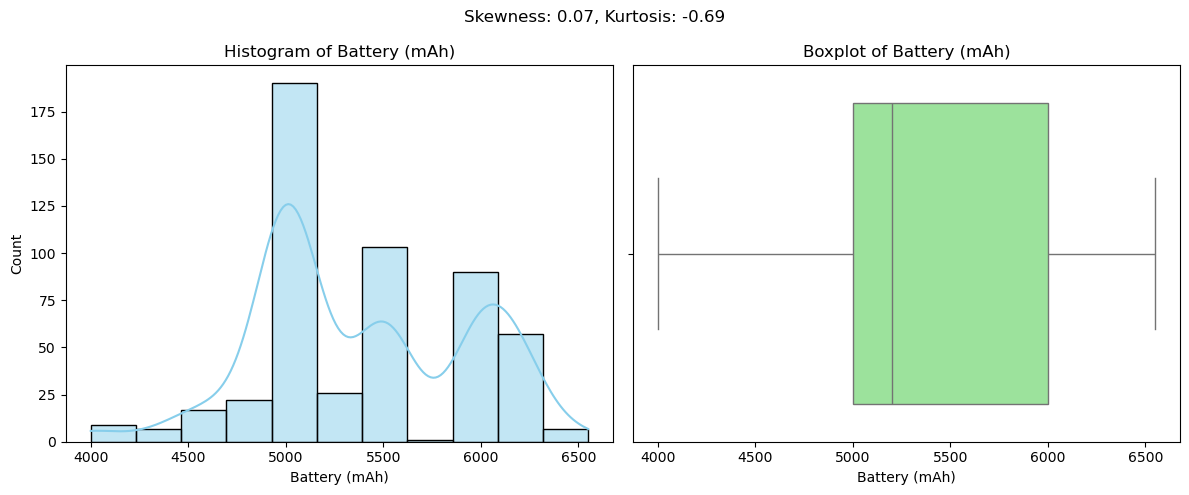

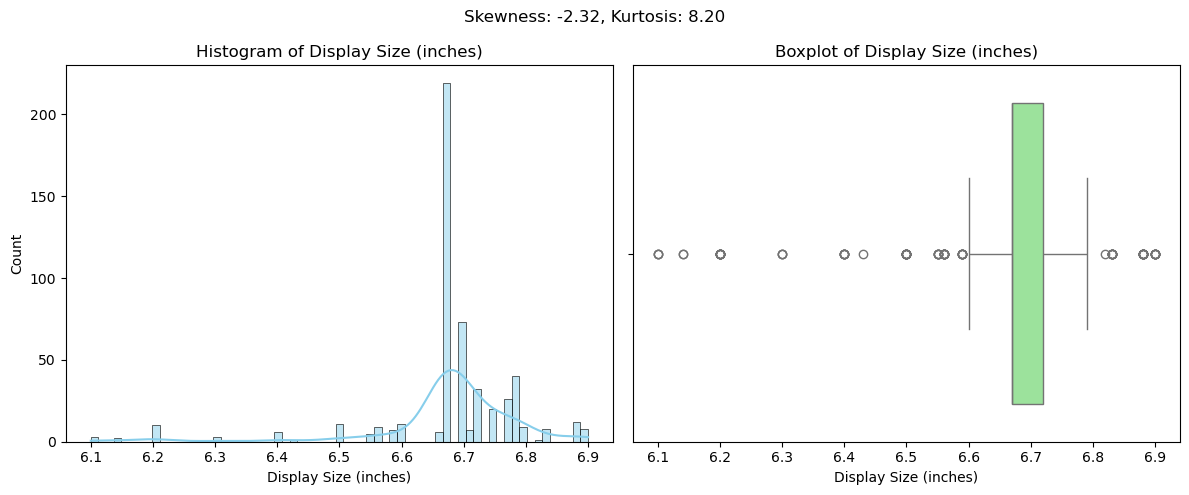

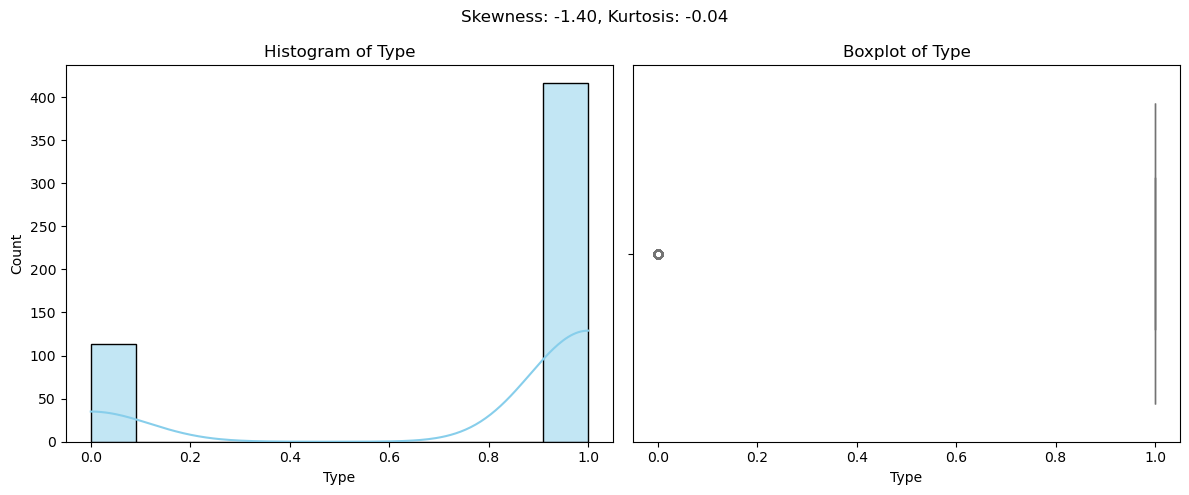

In [102]:
#----->3.Visual Analysis,Skewness, kurtosis
#      4.Examine features’ distribution

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    
    plt.suptitle(f'Skewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurtosis():.2f}', fontsize=12)
    plt.tight_layout()
    plt.show()


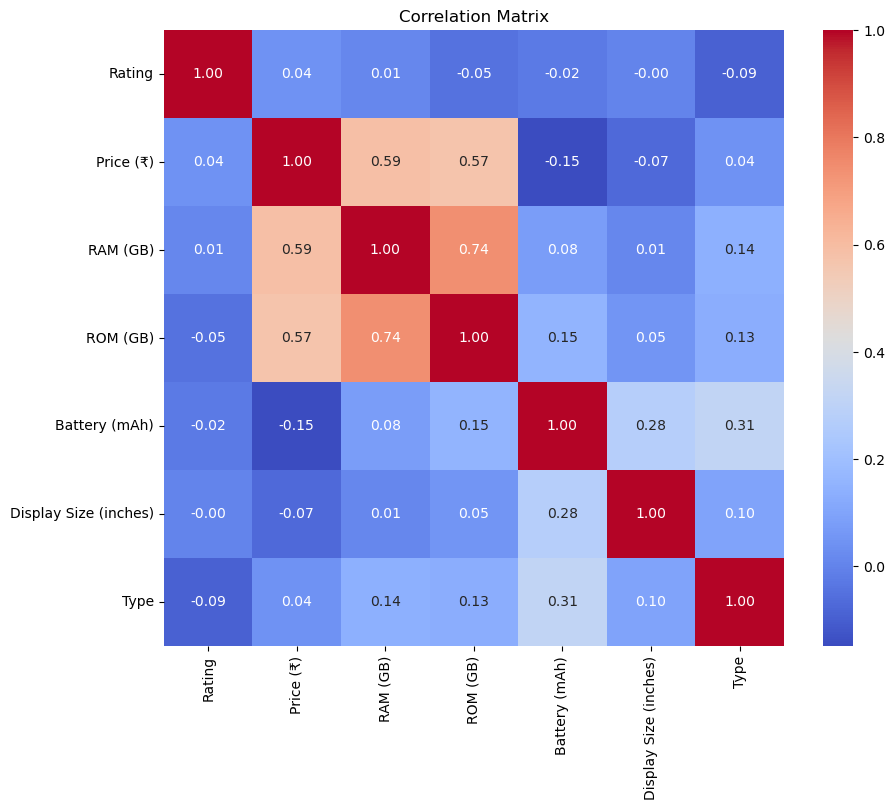

In [58]:
# Correlation matrix
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Covariance matrix
cov_matrix = df[numeric_cols].cov()


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [106]:
df

,Rating,Price (₹),RAM (GB),ROM (GB),Battery (mAh),Display Size (inches),Type
0,4.5,39799,8,128,4700.0,6.70,1
1,4.4,49999,12,512,4500.0,6.70,1
2,4.4,16999,6,128,6000.0,6.67,1
3,4.4,23999,8,128,5500.0,6.67,1
4,4.1,41999,12,512,5200.0,6.78,1
...,...,...,...,...,...,...,...
524,4.6,66299,12,256,6000.0,6.82,0
525,4.2,74999,12,256,4700.0,6.30,0
526,4.0,6600,4,64,5000.0,6.71,0
527,4.4,15499,6,128,5000.0,6.70,1


In [14]:
df['RAM (GB)'] = pd.to_numeric(df['RAM (GB)'], errors='coerce')
df['ROM (GB)'] = pd.to_numeric(df['ROM (GB)'], errors='coerce')
df.dropna(subset=['RAM (GB)', 'ROM (GB)'], inplace=True)

In [108]:
def price_category(price):
    if price <= 15000:
        return 'Low'
    elif price <= 30000:
        return 'Mid'
    else:
        return 'High'

In [110]:
df['Price_Category'] = df['Price (₹)'].apply(price_category)

# Encode price categories into numeric labels
le = LabelEncoder()
df['Price_Label'] = le.fit_transform(df['Price_Category'])  # Low=1, Mid=2, High=0 (or similar)
df

,Rating,Price (₹),RAM (GB),ROM (GB),Battery (mAh),Display Size (inches),Type,Price_Category,Price_Label
0,4.5,39799,8,128,4700.0,6.70,1,High,0
1,4.4,49999,12,512,4500.0,6.70,1,High,0
2,4.4,16999,6,128,6000.0,6.67,1,Mid,2
3,4.4,23999,8,128,5500.0,6.67,1,Mid,2
4,4.1,41999,12,512,5200.0,6.78,1,High,0
...,...,...,...,...,...,...,...,...,...
524,4.6,66299,12,256,6000.0,6.82,0,High,0
525,4.2,74999,12,256,4700.0,6.30,0,High,0
526,4.0,6600,4,64,5000.0,6.71,0,Low,1
527,4.4,15499,6,128,5000.0,6.70,1,Mid,2


In [ ]:
#---> Logistic Regression

In [160]:
# Prepare features and labels
X = df.drop(columns=['Price (₹)', 'Price_Category', 'Price_Label'])
y = df['Price_Label']

In [162]:
# Feature Scaling (only for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [164]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [166]:
# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

In [168]:
print("📊 Logistic Regression Results:")
print(classification_report(y_test, y_pred_log, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

📊 Logistic Regression Results:
              precision    recall  f1-score   support

        High       0.79      0.86      0.83        44
         Low       0.67      0.73      0.70        22
         Mid       0.74      0.62      0.68        40

    accuracy                           0.75       106
   macro avg       0.73      0.74      0.73       106
weighted avg       0.74      0.75      0.74       106

Accuracy: 0.7452830188679245


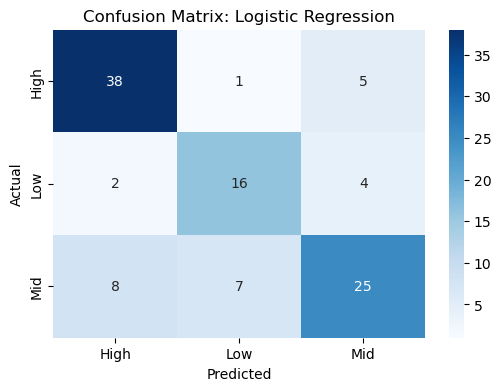

In [170]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()
plot_confusion_matrix(y_test, y_pred_log, "Confusion Matrix: Logistic Regression")

In [ ]:
#---->Linear Regression

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Prepare features and target
X = df.drop(columns=['Price (₹)', 'Price_Category', 'Price_Label','Rating'])
y = df['Price (₹)']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Linear Regression Results:
RMSE: 15104.06
R² Score: 0.3733


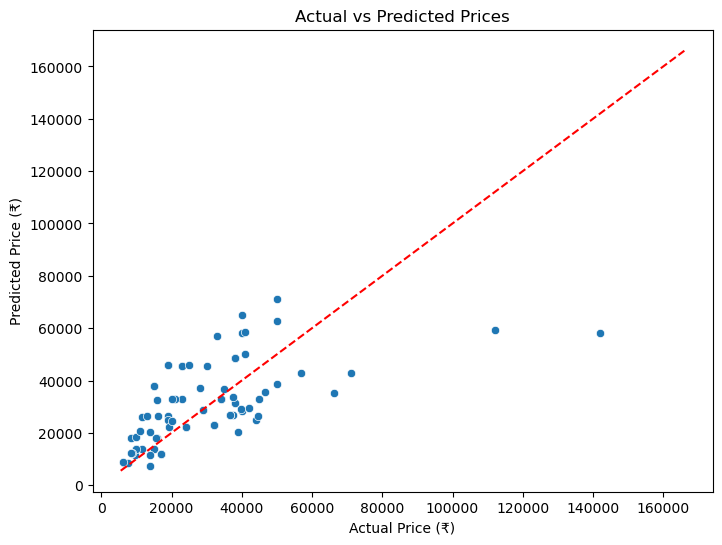

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # identity line
plt.xlabel('Actual Price (₹)')
plt.ylabel('Predicted Price (₹)')
plt.title('Actual vs Predicted Prices')
plt.show()


In [ ]:
#---->Random Forest

In [173]:

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_rf, y_train_rf)
y_pred_rf = rf.predict(X_test_rf)

In [177]:
print("\n🌲 Random Forest Classifier Results:")
print(classification_report(y_test_rf, y_pred_rf, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf)) 


🌲 Random Forest Classifier Results:
              precision    recall  f1-score   support

        High       0.81      0.80      0.80        44
         Low       0.95      0.91      0.93        22
         Mid       0.76      0.80      0.78        40

    accuracy                           0.82       106
   macro avg       0.84      0.83      0.84       106
weighted avg       0.82      0.82      0.82       106

Accuracy: 0.8207547169811321


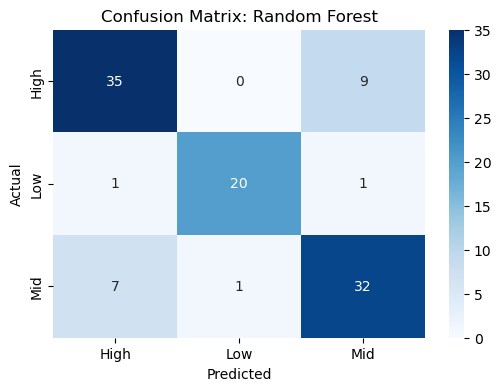

In [179]:
plot_confusion_matrix(y_test_rf, y_pred_rf, "Confusion Matrix: Random Forest")

C:\Users\smart\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


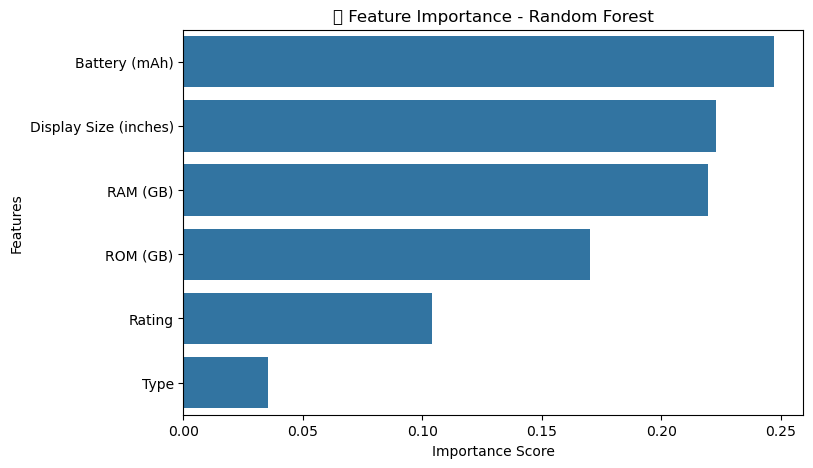

In [181]:
import numpy as np
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=features[indices],hue=None, dodge=False)
plt.title("🔍 Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

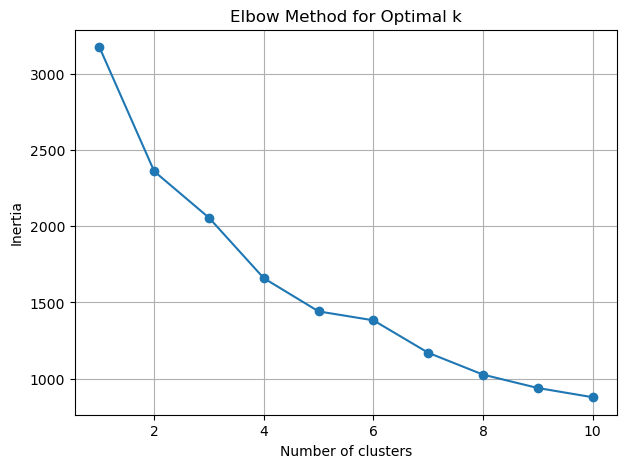

C:\Users\smart\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


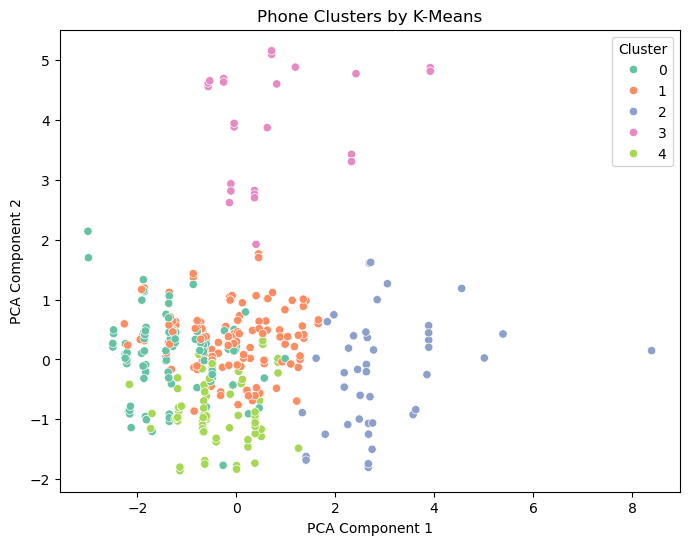

In [191]:
from sklearn.preprocessing import StandardScaler

# Select numeric and encoded categorical features
X_clust = df[['Rating', 'Price (₹)', 'RAM (GB)', 'ROM (GB)', 'Battery (mAh)', 'Display Size (inches)']]
X_clust = X_clust.dropna()  # drop missing values if any

# Scale features (important for distance-based models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
df['Cluster'] = clusters
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Phone Clusters by K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
